# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from imblearn.over_sampling import RandomOverSampler
import pickle
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,mean_squared_error
import datetime
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dropout, Dense,MaxPooling1D, Flatten, Bidirectional, Convolution1D


2023-06-20 21:53:39.542017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Loading the dataset


In [3]:
# Read the CSV file and store it in a DataFrame
df = pd.read_csv('hotel_bookings.csv')

# Exploratory Data Analysis

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
# Extract column names of the DataFrame
column_names = df.columns

# Display the column names
print(column_names)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [7]:
# Check the dimensions of the DataFrame (rows, columns)
df.shape

(119390, 32)

In [8]:
# Get general information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# Get summary statistics about the numerical columns of DataFrame
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
# Create new features based on existing ones
df['booking_lead_time'] = df['arrival_date_year'] - df['lead_time']

# Data Cleaning

In [11]:
# Check for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
# removing unnecessary columns having large number of missing values
df.drop(['agent','company'], axis = 1, inplace = True)

# removing rows with missing values in other columns
df.dropna(inplace = True)

In [13]:
# Check for duplicate rows
df.duplicated().sum()

31984

In [14]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [15]:
# Convert "reservation_status_date" column to datetime data type
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Verify the data type conversion
print(df['reservation_status_date'].dtype)


datetime64[ns]


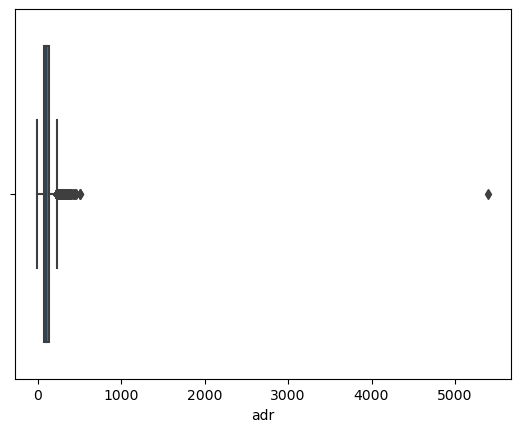

In [16]:
# Identify and handle outliers using appropriate methods
sns.boxplot(x=df['adr'])

# Remove outliers
lower_threshold = df['adr'].quantile(0.05)
upper_threshold = df['adr'].quantile(0.95)
df = df[(df['adr'] > lower_threshold) & (df['adr'] < upper_threshold)]


# Data Analysis and Visualization

1. The average lead time for canceled bookings is higher than that for non-canceled bookings.

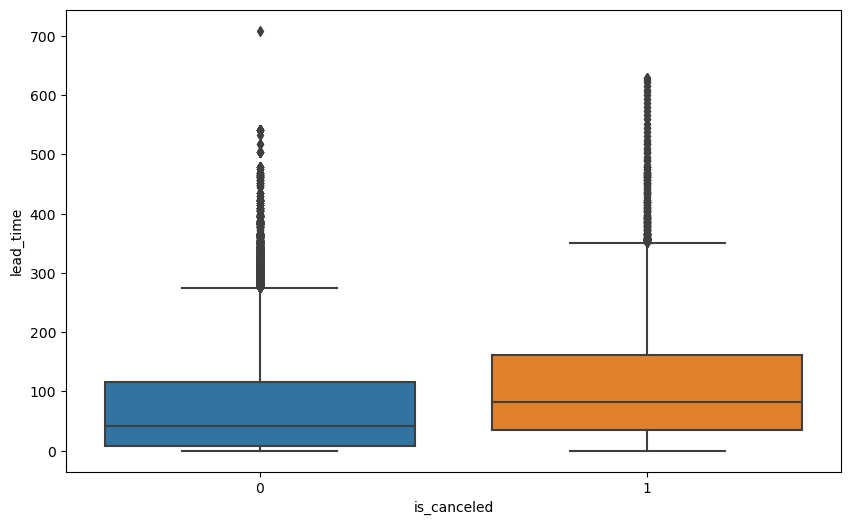

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.show()


2. Bookings made by repeated guests have a higher average number of total special requests.

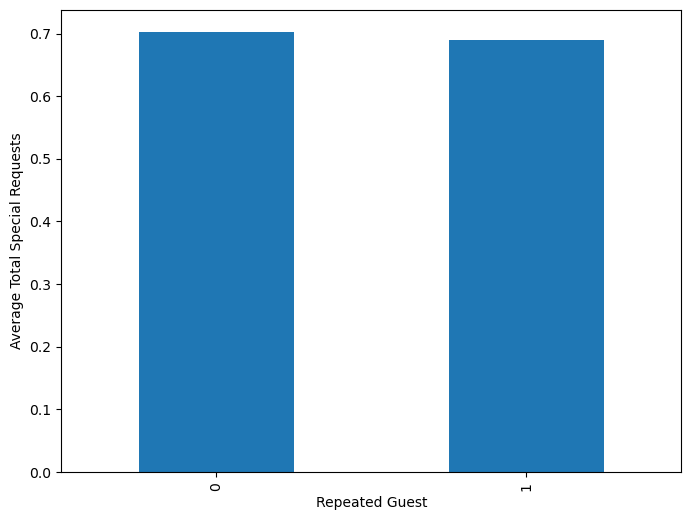

In [18]:
plt.figure(figsize=(8, 6))

# Grouping by is_repeated_guest and calculating the average number of total special requests
avg_special_requests = df.groupby('is_repeated_guest')['total_of_special_requests'].mean()

# Bar plot comparing average total special requests for repeated and non-repeated guests
avg_special_requests.plot(kind='bar')
plt.xlabel('Repeated Guest')
plt.ylabel('Average Total Special Requests')
plt.show()

3. Certain meal types have a higher average daily rate (adr) compared to others.

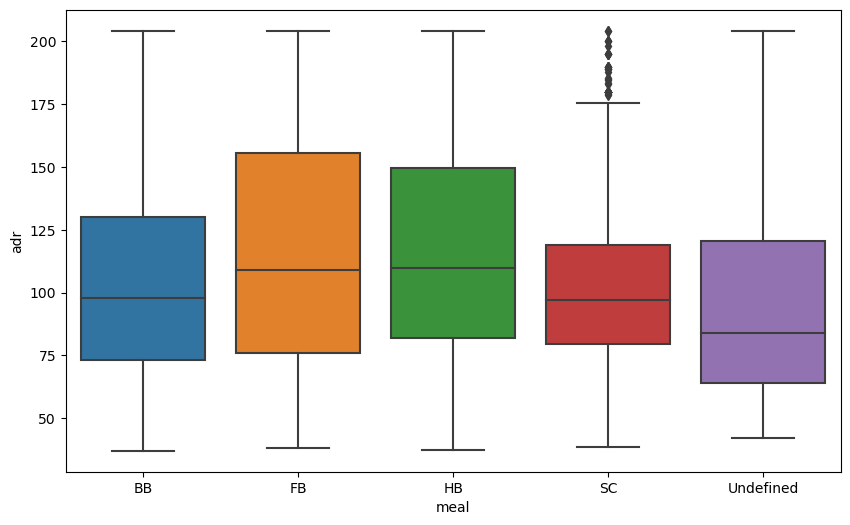

In [19]:
# Box plot comparing meal type and adr
plt.figure(figsize=(10, 6))
sns.boxplot(x='meal', y='adr', data=df)
plt.show()

4. The distribution of lead time varies across different market segments.

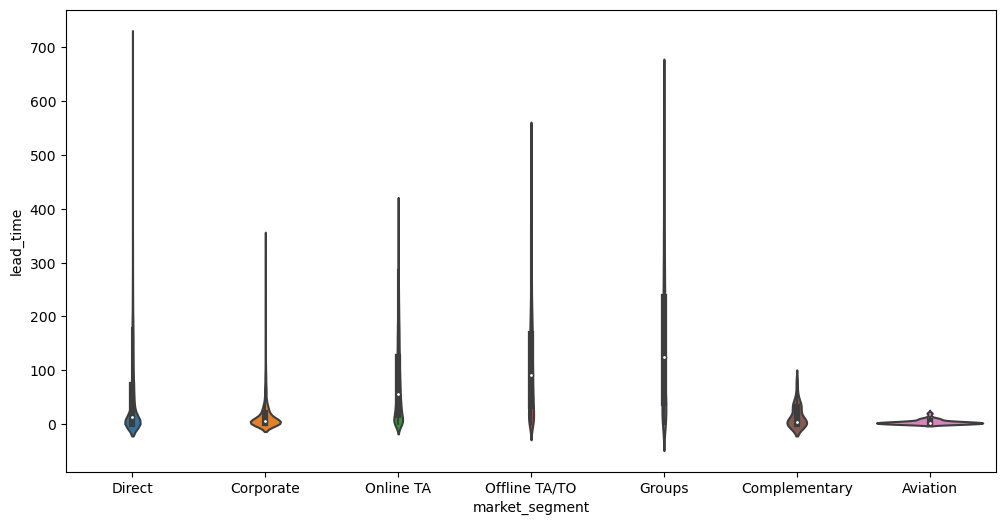

In [20]:
# Violin plot comparing lead time for different market segments
plt.figure(figsize=(12, 6))
sns.violinplot(x='market_segment', y='lead_time', data=df)
plt.show()


5. Bookings made through specific distribution channels have a higher average number of previous cancellations.

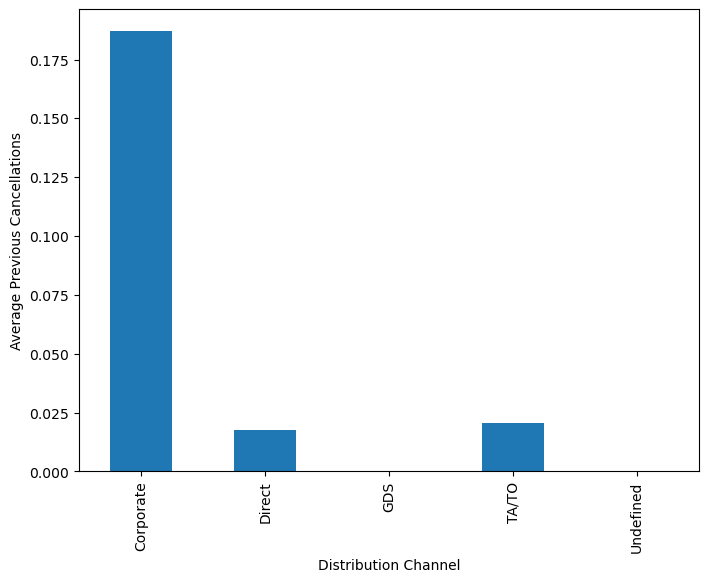

In [21]:
# Grouping by distribution_channel and calculating the average number of previous cancellations
avg_prev_cancellations = df.groupby('distribution_channel')['previous_cancellations'].mean()

# Bar plot comparing average previous cancellations for different distribution channels
plt.figure(figsize=(8, 6))

avg_prev_cancellations.plot(kind='bar')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Previous Cancellations')
plt.show()


6. The number of booking changes is positively correlated with the number of previous bookings not canceled.

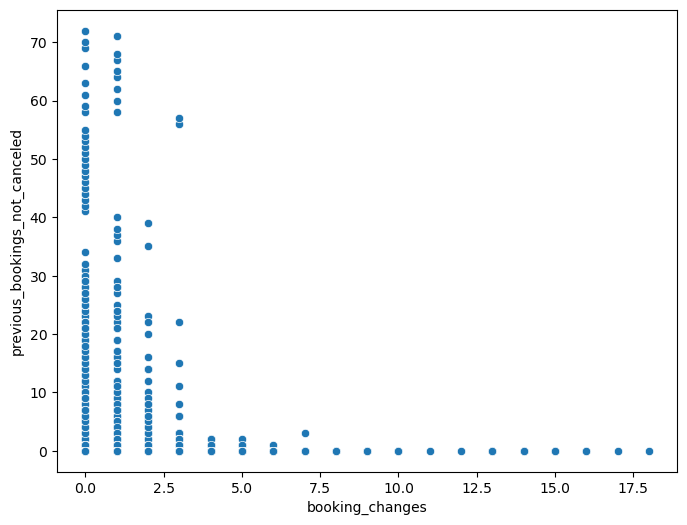

In [22]:
# Scatter plot comparing booking_changes and previous_bookings_not_canceled
plt.figure(figsize=(8, 6))
sns.scatterplot(x='booking_changes', y='previous_bookings_not_canceled', data=df)
plt.show()


7. Certain room types have a higher average daily rate (adr) compared to others.

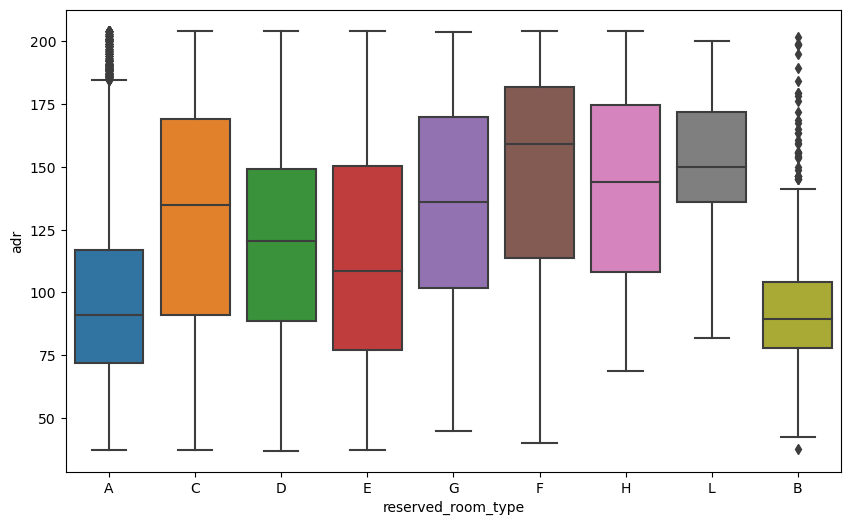

In [23]:
# Box plot comparing reserved_room_type and adr
plt.figure(figsize=(10, 6))
sns.boxplot(x='reserved_room_type', y='adr', data=df)
plt.show()


8. The average adr is different for different hotel types.

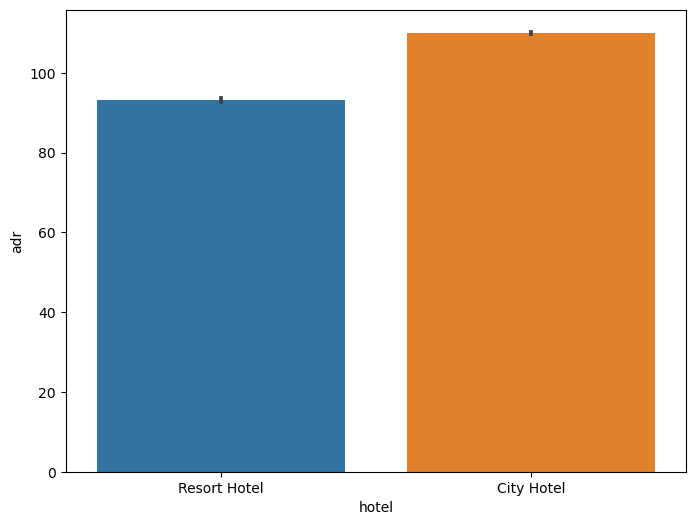

In [24]:
# Bar plot comparing average adr for different hotel types
plt.figure(figsize=(8, 6))
sns.barplot(x='hotel', y='adr', data=df)
plt.show()


9. Cancelled bookings (around 27%) is higher than not cancelled bookings (72%).

0    0.721996
1    0.278004
Name: is_canceled, dtype: float64


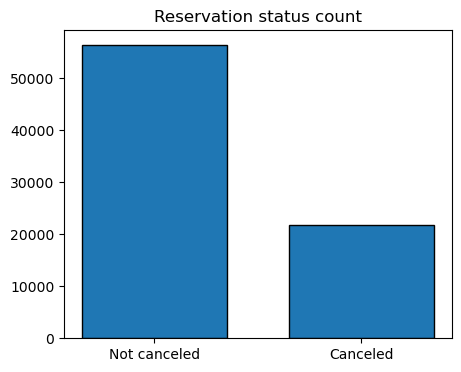

In [25]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show()

10. Reservation status in different hotels.

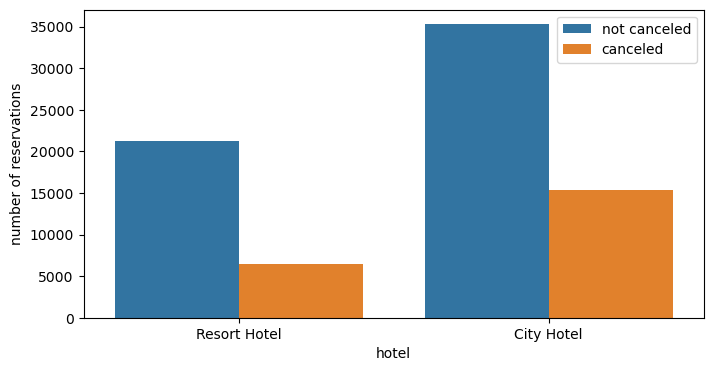

In [26]:
plt.figure(figsize = (8,4))
ax1= sns.countplot(x = 'hotel', hue = 'is_canceled', data = df)
legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()


11. Reservation status in different months of the year.

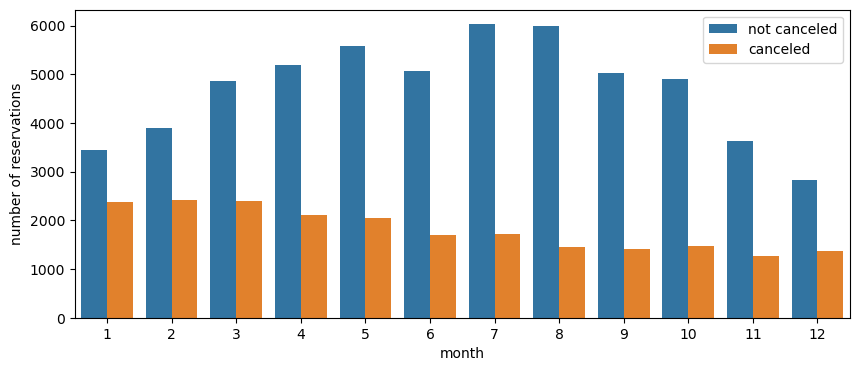

In [27]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (10,4))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df)
legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

12. Average daily rate in different months.

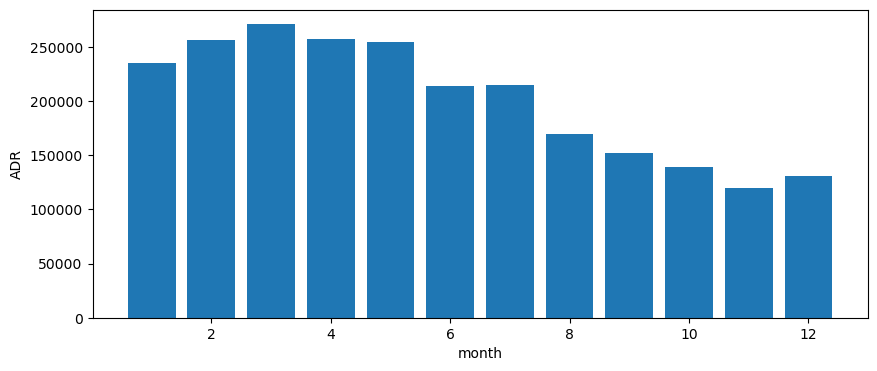

In [28]:
plt.figure(figsize = (10,4))
plt.bar('month', 'adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.xlabel('month')
plt.ylabel('ADR')
plt.show()

13. Top 10 countries with reservation cancelled.

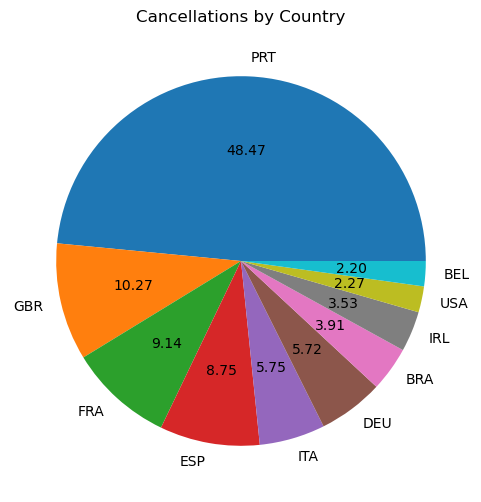

In [29]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (6,6))
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.title('Cancellations by Country')
plt.show()


14. Which market segment generating more bookings?

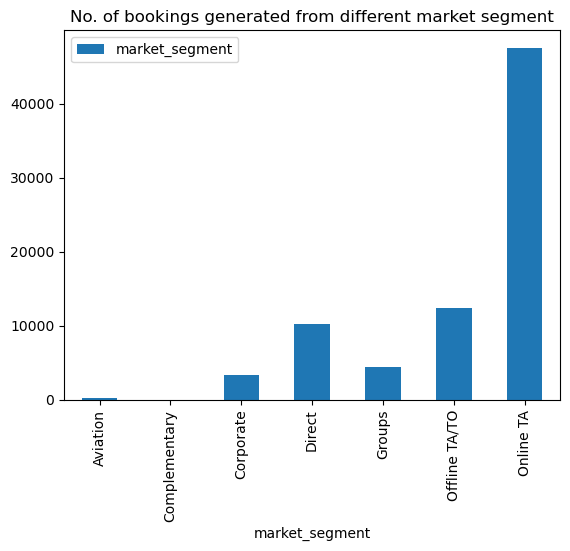

In [30]:
df.groupby(['market_segment'])[['market_segment']].count().plot(kind = 'bar')
plt.title('No. of bookings generated from different market segment')
plt.show()

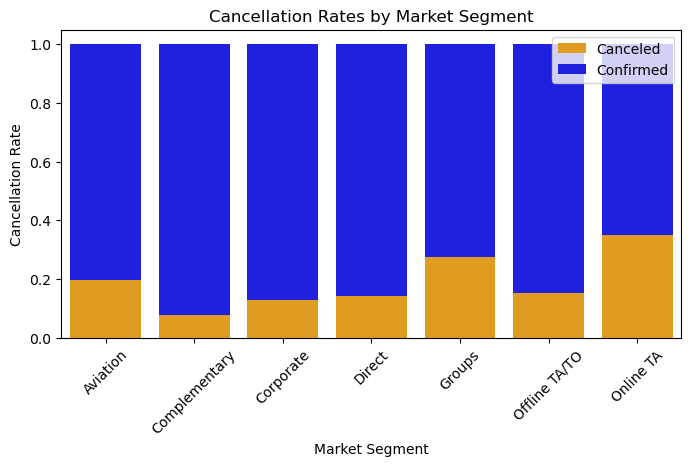

In [31]:

# Calculate cancellation rates by market segment
cancellation_rates = pd.crosstab(df['market_segment'], df['is_canceled'], normalize='index')

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=cancellation_rates.index, y=cancellation_rates[1], color='orange', label='Canceled')
sns.barplot(x=cancellation_rates.index, y=cancellation_rates[0], color='blue', label='Confirmed', bottom=cancellation_rates[1])
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rates by Market Segment')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing

In [32]:
le = LabelEncoder()

# Create an empty dictionary to store the encoders
encoders = {}

# Define the list of categorical columns to encode
categorical_columns = ['hotel', 'arrival_date_month', 'country', 'meal',
                       'market_segment', 'distribution_channel',
                       'reserved_room_type', 'assigned_room_type',
                       'deposit_type', 'customer_type', 'reservation_status']

# Encode categorical columns using LabelEncoder and store the encoders
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le

# Save the encoders dictionary
joblib.dump(encoders, 'encoders.pkl')

['encoders.pkl']

In [33]:
# data splitting

X = df.drop(['is_canceled', 'reservation_status','reservation_status_date'], axis = 1)
y = df[['is_canceled']]

# balancing the imbalanced dataset using random sampling
# define oversampling strategy
over = RandomOverSampler(sampling_strategy = 'minority')

# fit and apply the transform
X, y = over.fit_resample(X, y)

In [34]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform data normalization on the numeric columns
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the normalized values
df_normalized_features = pd.DataFrame(X_scaled, columns=X.columns)

In [35]:
len(df_normalized_features.columns)

29

In [36]:
df_normalized_features['is_canceled'] = y['is_canceled']

<Axes: >

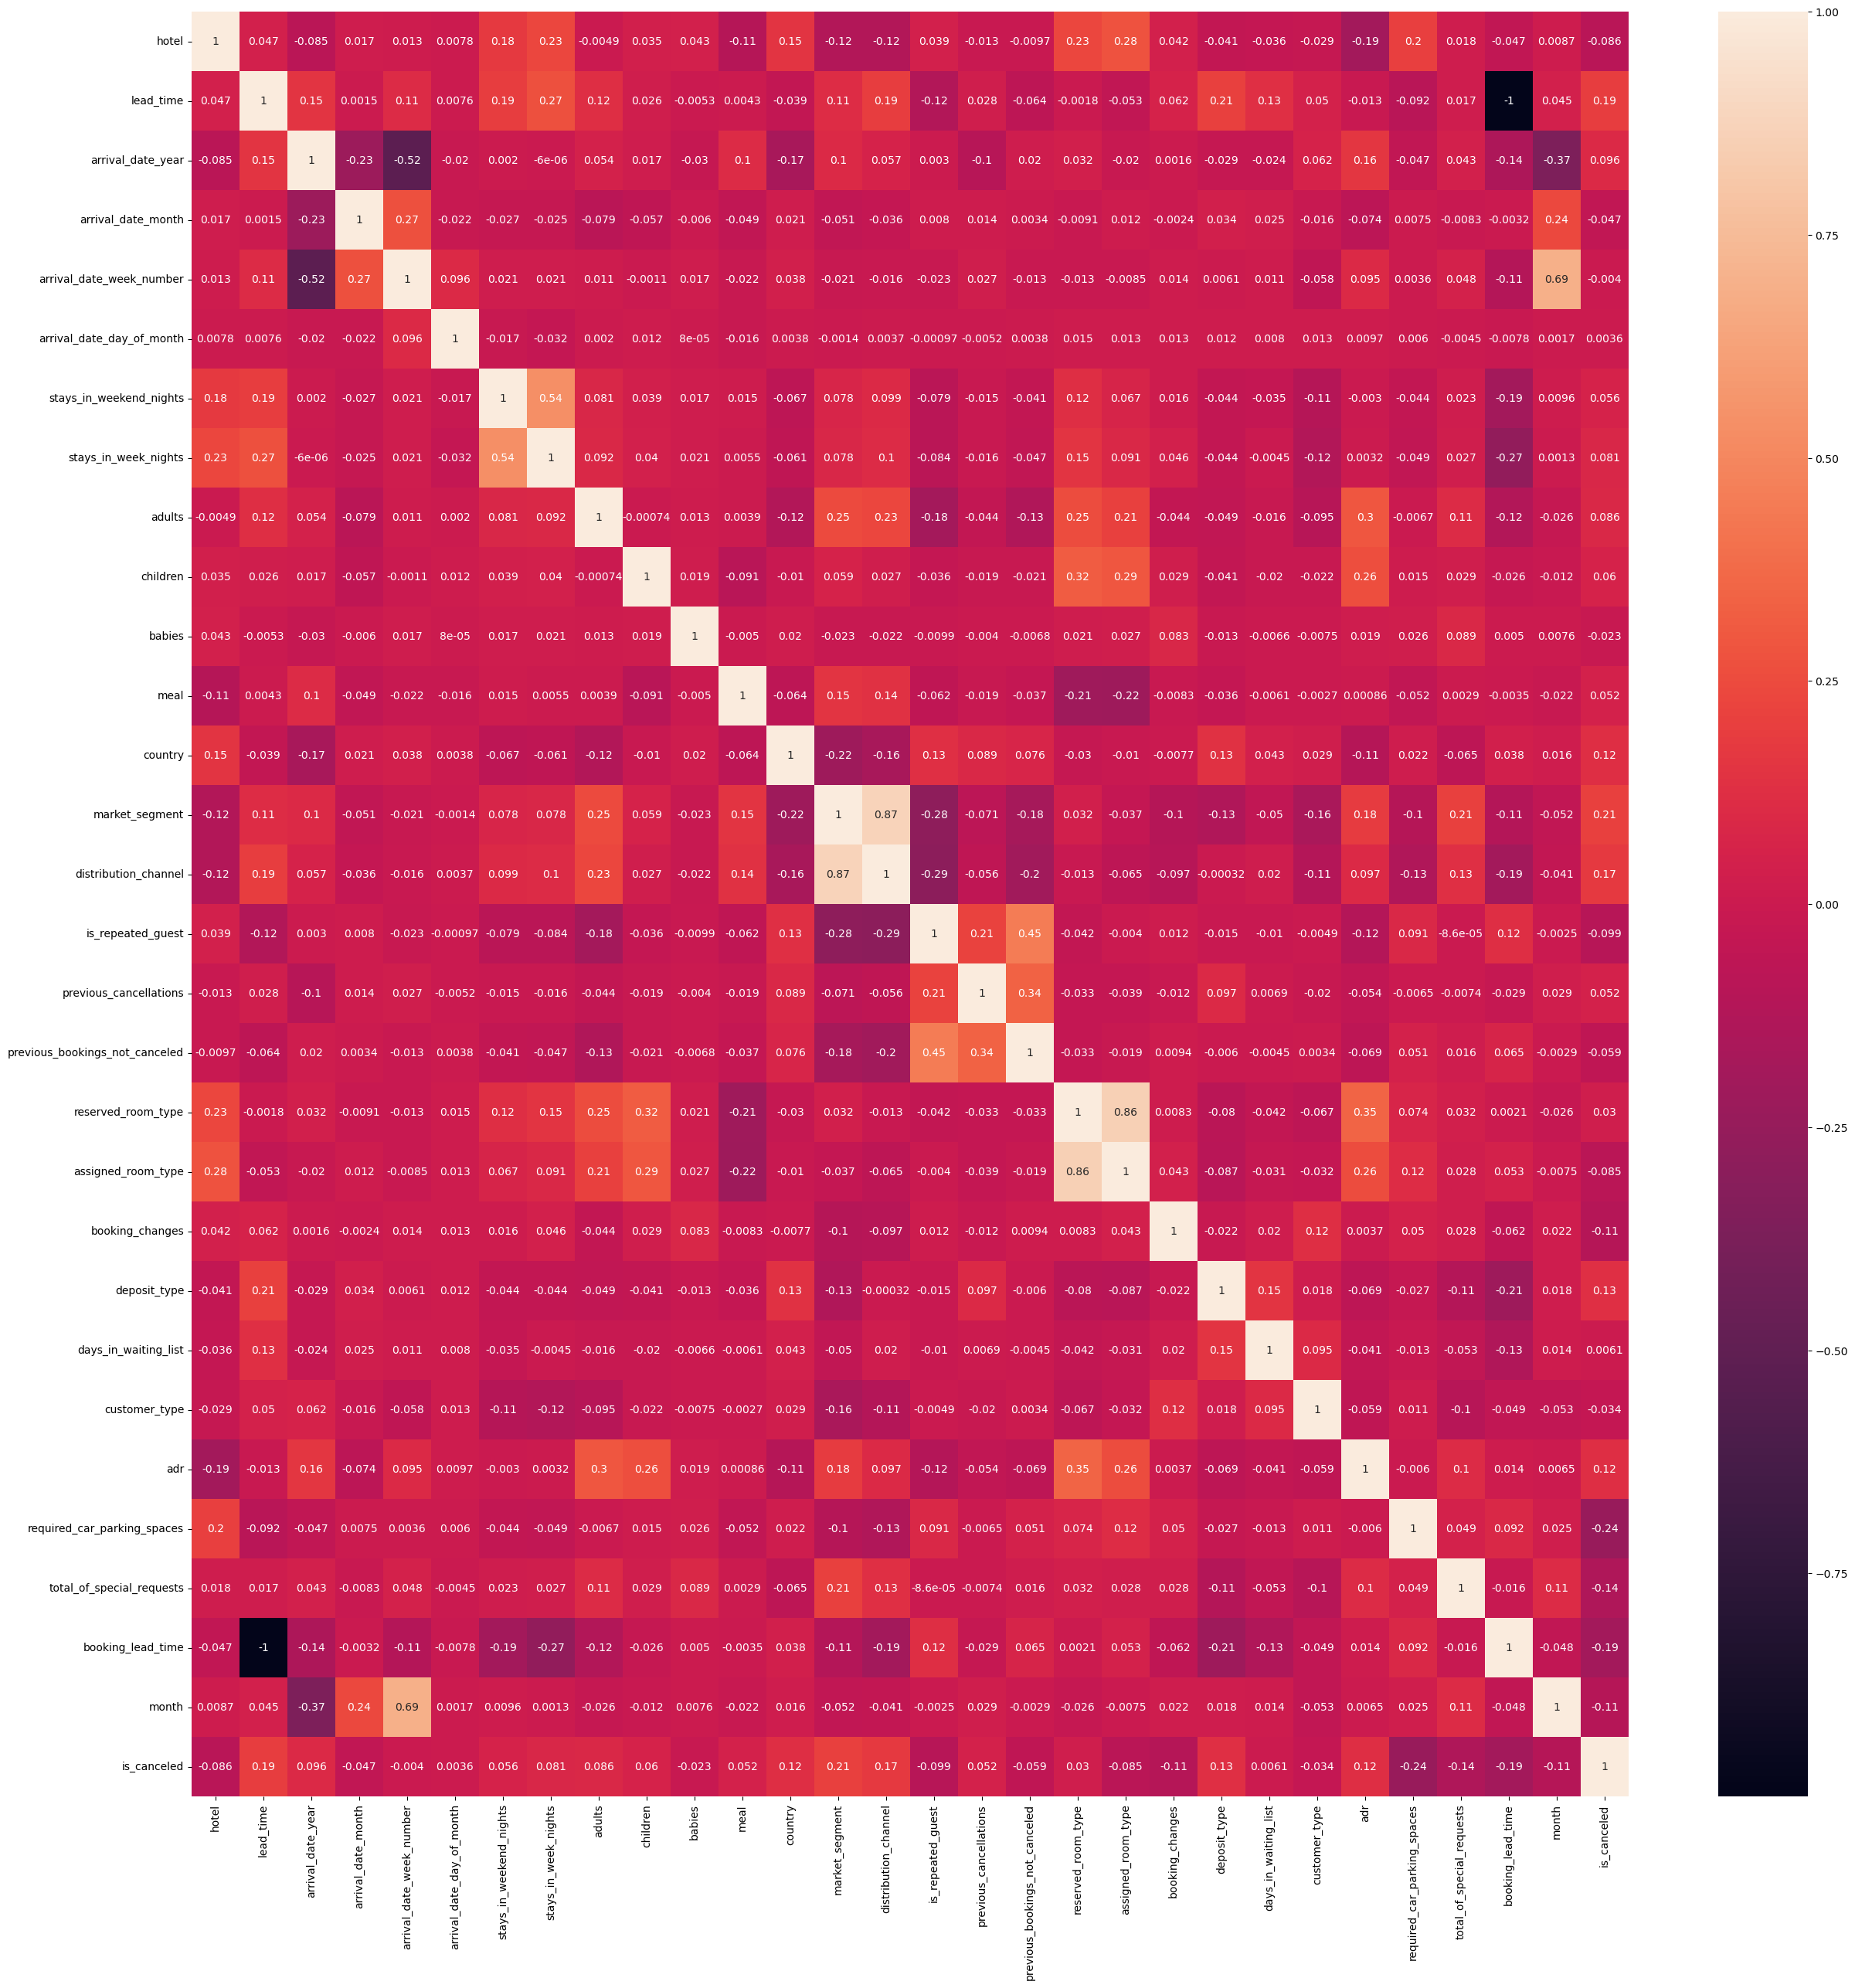

In [37]:
plt.figure(figsize =(30,30))
sns.heatmap(df_normalized_features.corr(), annot = True)

<Axes: >

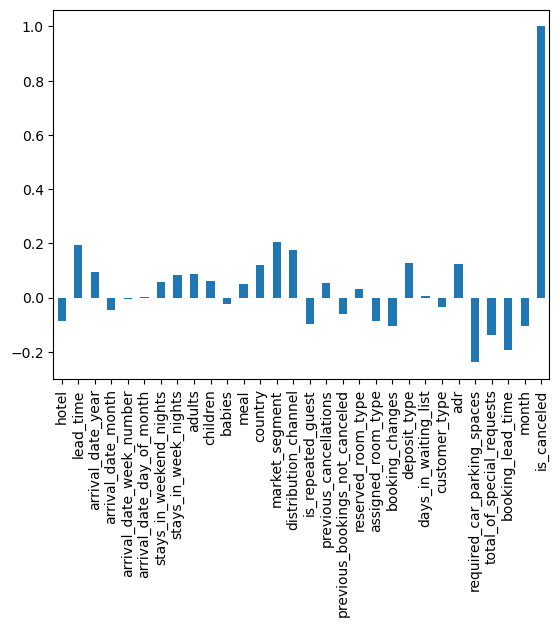

In [38]:
# correlation coefficient between each feature and the target variable
df_normalized_features.corr()['is_canceled'].plot(kind = 'bar')

In [39]:
# Split the data into training and test sets using
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (90320, 29)
X_test shape: (22580, 29)
y_train shape: (90320, 1)
y_test shape: (22580, 1)


# Feature Engineering

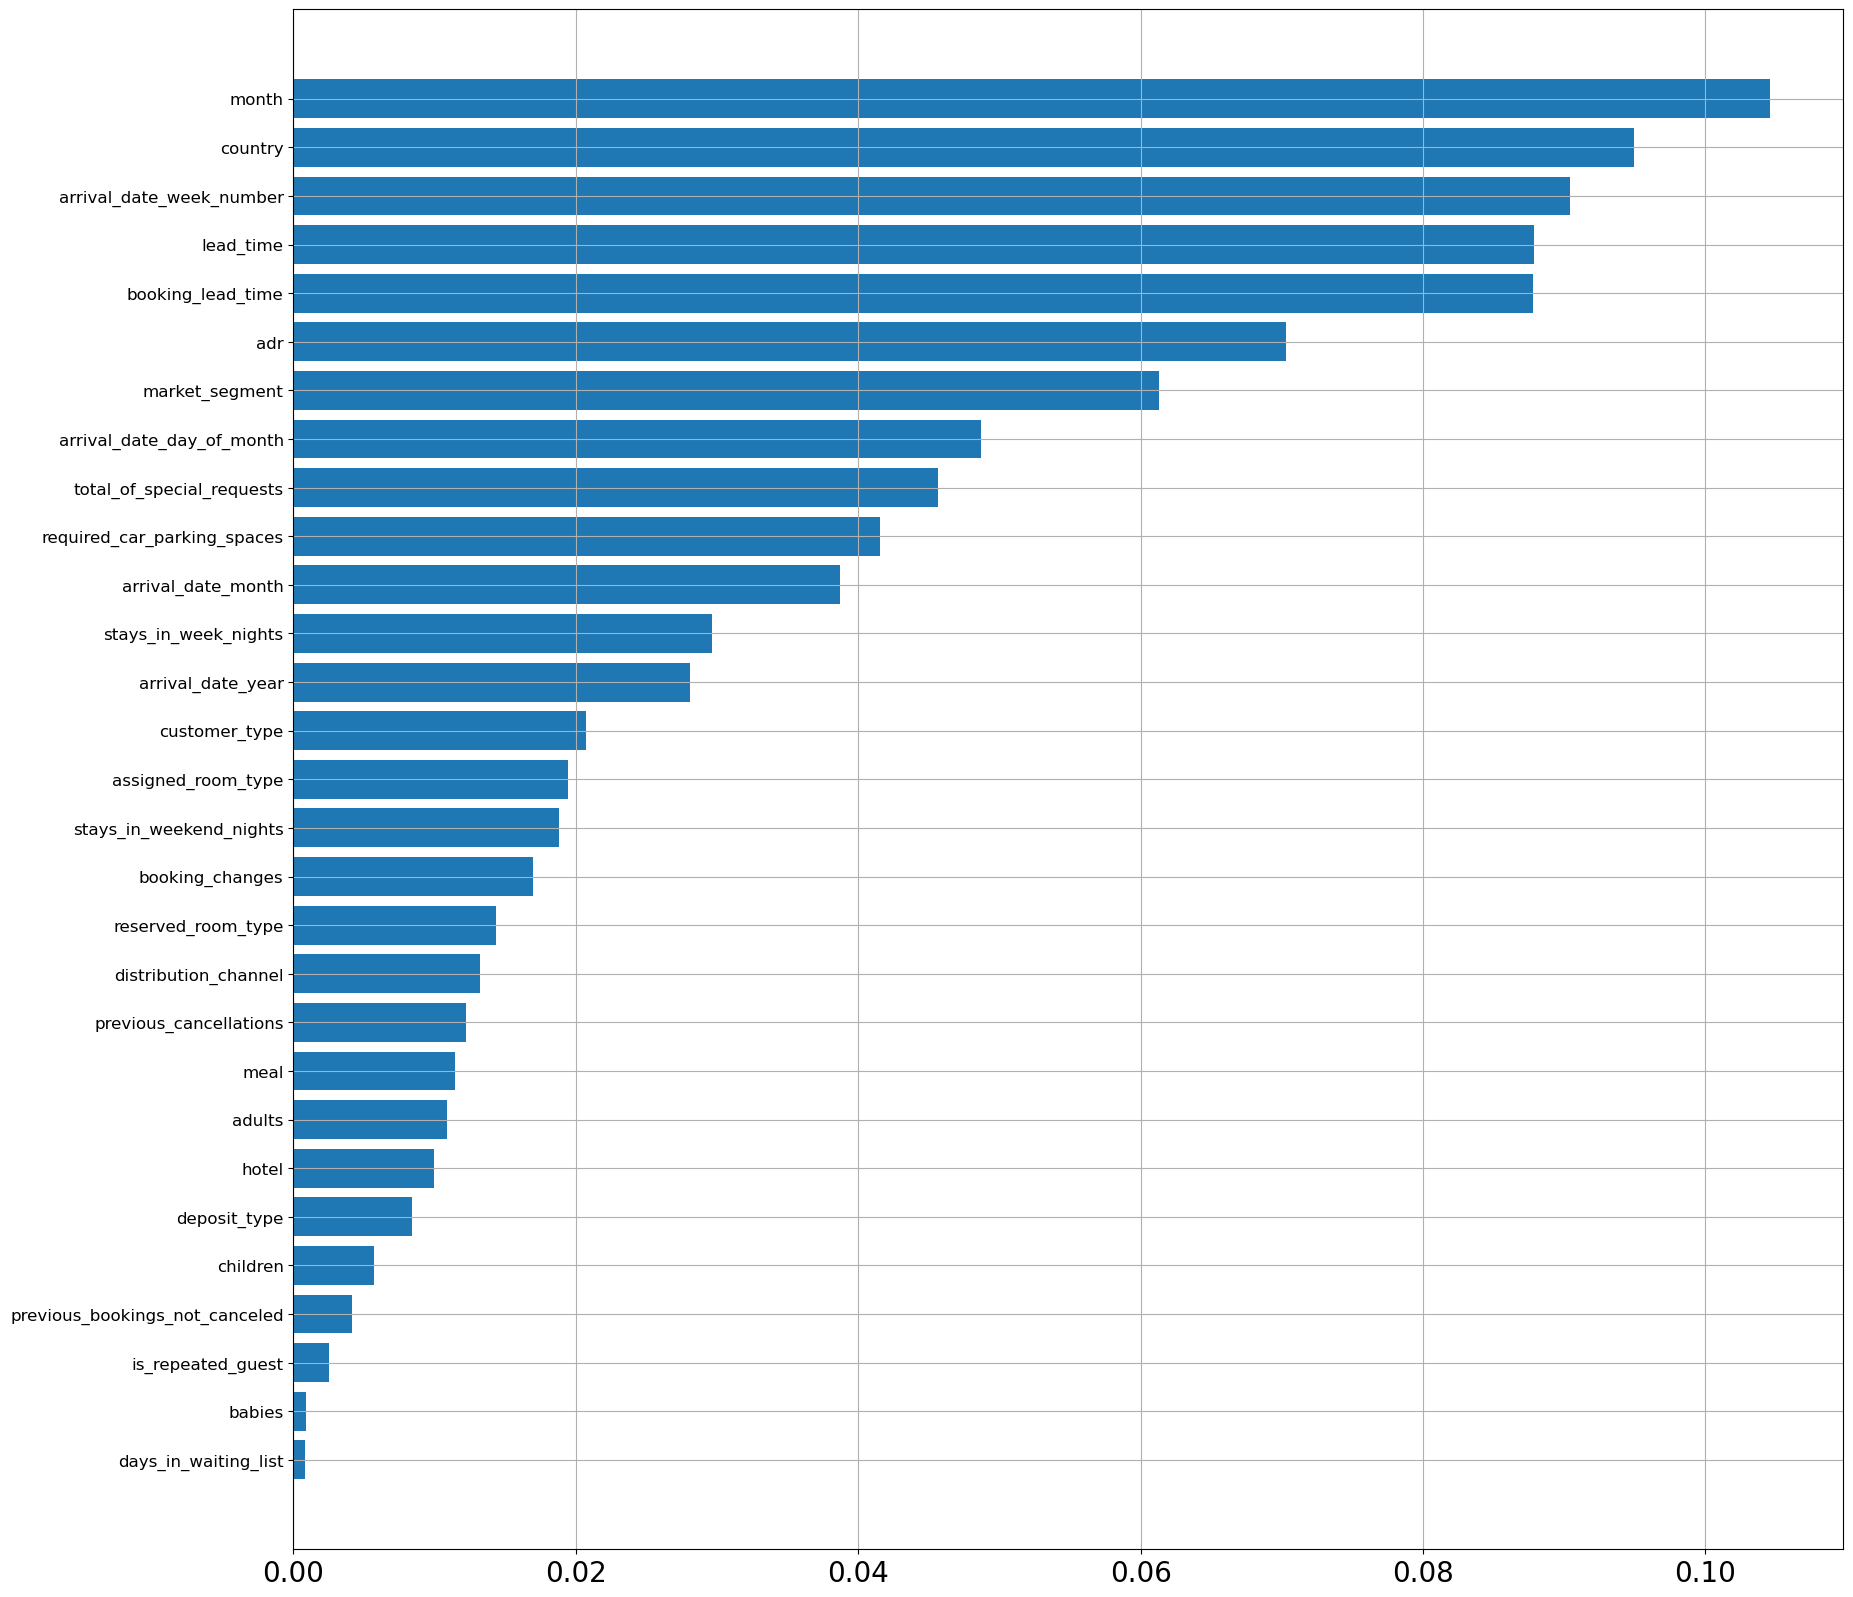

In [40]:

# Selecting important features using Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# training the model on the train data
rf.fit(X_train,y_train)

# plotting the features according to their importances in bar chart
f_i = list(zip(X.columns.to_list(),rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.figure(figsize = (20,20))
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 20)
plt.grid()
plt.show()

In [41]:
print('Top 25 Important Features\n')
print([x[0] for x in f_i[-25:]])

Top 25 Important Features

['children', 'deposit_type', 'hotel', 'adults', 'meal', 'previous_cancellations', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'stays_in_weekend_nights', 'assigned_room_type', 'customer_type', 'arrival_date_year', 'stays_in_week_nights', 'arrival_date_month', 'required_car_parking_spaces', 'total_of_special_requests', 'arrival_date_day_of_month', 'market_segment', 'adr', 'booking_lead_time', 'lead_time', 'arrival_date_week_number', 'country', 'month']


In [42]:
# selecting top 25 important features
X_selected = X[[x[0] for x in f_i[-25:]]] # features
# y = df_normalized['is_canceled'] 

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform data normalization
X_scaled = scaler.fit_transform(X_selected)

# Save the scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# Split the data into training and test sets using
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [43]:
X_selected.iloc[0]

children                          0.0
deposit_type                      0.0
hotel                             1.0
adults                            1.0
meal                              0.0
previous_cancellations            0.0
distribution_channel              1.0
reserved_room_type                0.0
booking_changes                   0.0
stays_in_weekend_nights           0.0
assigned_room_type                2.0
customer_type                     2.0
arrival_date_year              2015.0
stays_in_week_nights              1.0
arrival_date_month                5.0
required_car_parking_spaces       0.0
total_of_special_requests         0.0
arrival_date_day_of_month         1.0
market_segment                    3.0
adr                              75.0
booking_lead_time              2008.0
lead_time                         7.0
arrival_date_week_number         27.0
country                          57.0
month                             7.0
Name: 0, dtype: float64

# Model Building and Evaluation

Decision Tree Classifier : 
 --------------------------------------------------
Accuracy score: 93.89

ROC AUC score: 93.91

Classification Reoprt:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     11367
           1       0.91      0.97      0.94     11213

    accuracy                           0.94     22580
   macro avg       0.94      0.94      0.94     22580
weighted avg       0.94      0.94      0.94     22580



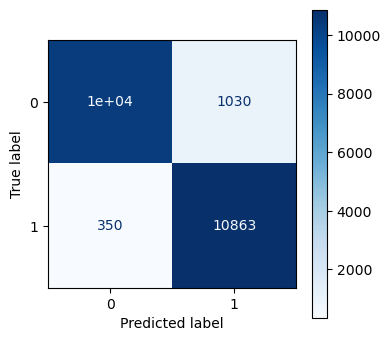

In [44]:
# Initializing the model
dc = DecisionTreeClassifier(random_state=42)

# training the model on train dataset
dc.fit(X_train,y_train)

print('Decision Tree Classifier : \n','-'*50)

# evaluating the model
y_prediction = dc.predict(X_test)
accuracy_dc = accuracy_score(y_test,y_prediction)*100

print('Accuracy score:', round(accuracy_dc,2))
print('\nROC AUC score:', round(roc_auc_score(y_test, y_prediction)*100,2))
print('\nClassification Reoprt:\n', classification_report(y_test, y_prediction))
cm = confusion_matrix(y_test, y_prediction, labels=dc.classes_)

fig, ax = plt.subplots(figsize=(4,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax, cmap = 'Blues')
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

Random Forest Classifier : 
 --------------------------------------------------
Accuracy score: 96.29

ROC AUC score: 96.29

Classification Reoprt:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     11367
           1       0.96      0.97      0.96     11213

    accuracy                           0.96     22580
   macro avg       0.96      0.96      0.96     22580
weighted avg       0.96      0.96      0.96     22580



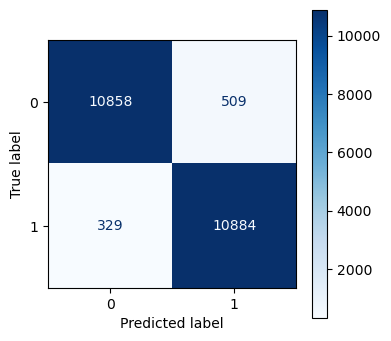

In [45]:
# Initializing the model
rf = RandomForestClassifier(random_state=42)

# training the model on train dataset
rf.fit(X_train,y_train)

print('Random Forest Classifier : \n','-'*50)

# evaluating the model
y_prediction = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_prediction)*100

print('Accuracy score:', round(accuracy_rf,2))
print('\nROC AUC score:', round(roc_auc_score(y_test, y_prediction)*100,2))
print('\nClassification Reoprt:\n', classification_report(y_test, y_prediction))
cm = confusion_matrix(y_test, y_prediction, labels=dc.classes_)

fig, ax = plt.subplots(figsize=(4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax, cmap = 'Blues')
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

Gaussian Naive Bayes : 
 --------------------------------------------------
Accuracy score: 57.3

ROC AUC score: 57.57

Classification Reoprt:
               precision    recall  f1-score   support

           0       0.87      0.18      0.30     11367
           1       0.54      0.97      0.69     11213

    accuracy                           0.57     22580
   macro avg       0.71      0.58      0.49     22580
weighted avg       0.71      0.57      0.49     22580



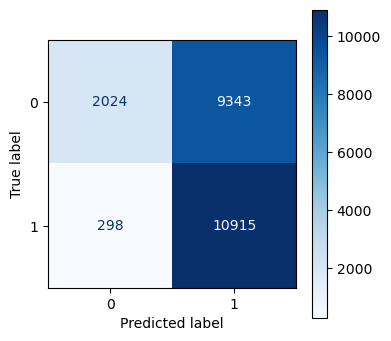

In [46]:
# Initializing the model
nb = GaussianNB()

# training the model on train dataset
nb.fit(X_train,y_train)

print('Gaussian Naive Bayes : \n','-'*50)

# evaluating the model
y_prediction = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test,y_prediction)*100

print('Accuracy score:', round(accuracy_nb,2))
print('\nROC AUC score:', round(roc_auc_score(y_test, y_prediction)*100,2))
print('\nClassification Reoprt:\n', classification_report(y_test, y_prediction))
cm = confusion_matrix(y_test, y_prediction, labels=dc.classes_)

fig, ax = plt.subplots(figsize=(4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax, cmap = 'Blues')
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

Logistic Regression : 
 --------------------------------------------------
Accuracy score: 71.97

ROC AUC score: 71.99

Classification Reoprt:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71     11367
           1       0.70      0.75      0.73     11213

    accuracy                           0.72     22580
   macro avg       0.72      0.72      0.72     22580
weighted avg       0.72      0.72      0.72     22580



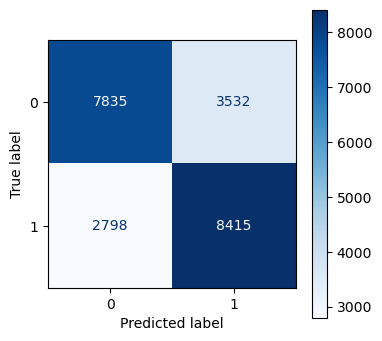

In [47]:
# Initializing the model

reg = LogisticRegression(random_state = 42)

# training the model on train dataset
reg.fit(X_train,y_train)

print('Logistic Regression : \n','-'*50)

# evaluating the model
y_prediction = reg.predict(X_test)
accuracy_reg = accuracy_score(y_test,y_prediction)*100
print('Accuracy score:', round(accuracy_reg,2))
print('\nROC AUC score:', round(roc_auc_score(y_test, y_prediction)*100,2))
print('\nClassification Reoprt:\n', classification_report(y_test, y_prediction))
cm = confusion_matrix(y_test, y_prediction, labels=dc.classes_)

fig, ax = plt.subplots(figsize=(4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax, cmap = 'Blues')
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

KNN : 
 --------------------------------------------------
Accuracy score: 83.3

ROC AUC score: 83.33

Classification Reoprt:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83     11367
           1       0.80      0.88      0.84     11213

    accuracy                           0.83     22580
   macro avg       0.84      0.83      0.83     22580
weighted avg       0.84      0.83      0.83     22580



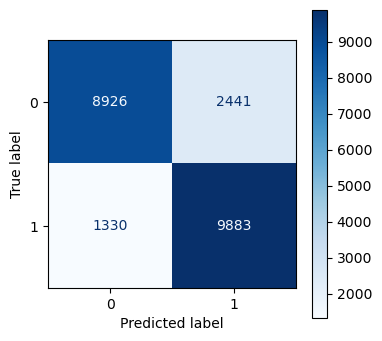

In [48]:
# Initializing the model

knn = KNeighborsClassifier()

# training the model on train dataset
knn.fit(X_train,y_train)

print('KNN : \n','-'*50)

# evaluating the model
y_prediction = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test,y_prediction)*100
print('Accuracy score:', round(accuracy_knn,2))
print('\nROC AUC score:', round(roc_auc_score(y_test, y_prediction)*100,2))
print('\nClassification Reoprt:\n', classification_report(y_test, y_prediction))
cm = confusion_matrix(y_test, y_prediction, labels=dc.classes_)

fig, ax = plt.subplots(figsize=(4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax, cmap = 'Blues')
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

In [49]:
# saving best fitted model
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Hotel Revenue Prediction

In [ ]:
## Load the revenue dataset created in Revenue_Time_series notebook 

In [50]:
# loading hotel revenue
hotel_revenue = pd.read_csv('hotel_revenue.csv')

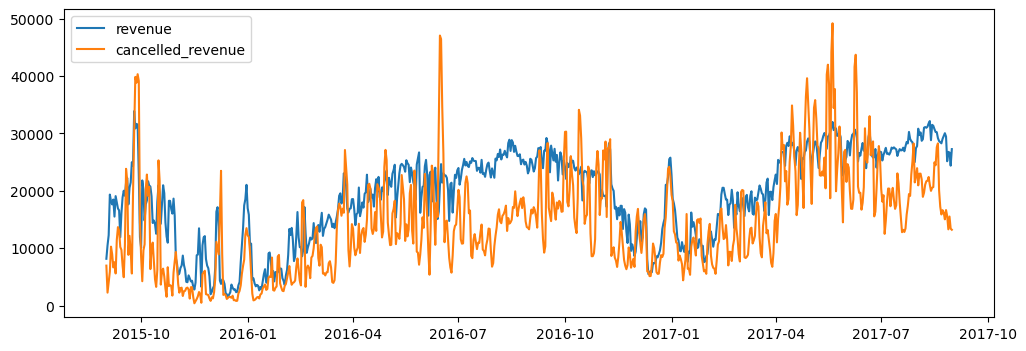

In [51]:
hotel_revenue['date'] = pd.to_datetime(hotel_revenue['date'])
plt.figure(figsize=(12,4))
plt.plot(hotel_revenue['date'],hotel_revenue['revenue'], label = 'revenue')
plt.plot(hotel_revenue['date'],hotel_revenue['cancelled_revenue'], label = 'cancelled_revenue')
plt.legend()
plt.show()

In [52]:
# initializing the model
model = LinearRegression()
X = hotel_revenue[['cancelled_revenue']] # independent variable
y = hotel_revenue[['revenue']] # dependent variable

# fitting model on feature and target
model.fit(X, y) 

# prediction
y_prediction = model.predict(X)

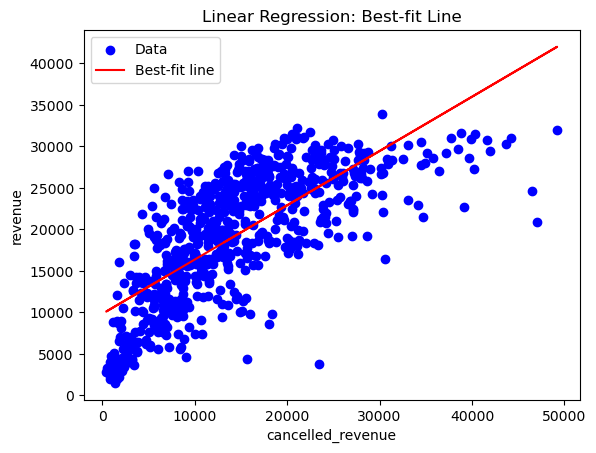

In [53]:
# Plot the data points and the best-fit line

plt.scatter(X, y, color='b', label='Data')
plt.plot(X, y_prediction, color='r', label='Best-fit line')
plt.xlabel('cancelled_revenue')
plt.ylabel('revenue')
plt.title('Linear Regression: Best-fit Line')
plt.legend()
plt.show()

In [54]:
cancelled_revenue = input('If Cancelled Revenue is ')
predicted_revenue = model.predict(pd.DataFrame(cancelled_revenue, index = [0], columns = ['cancelled_revenue']))[0][0]

print('Then the revenue would increase to ', round(predicted_revenue))

If Cancelled Revenue is  5000


Then the revenue would increase to  13082


In [55]:
scaler = MinMaxScaler()
hotel_revenue.set_index('date', inplace =  True)
cancelled_revenue = hotel_revenue[['cancelled_revenue']]
cancelled_revenue[['cancelled_revenue']] = scaler.fit_transform(hotel_revenue[['cancelled_revenue']])

In [56]:

window_size = 60
# Creating a data structure with 60 timesteps and 1 output
X = []
y = []
for i in range(window_size, len(cancelled_revenue)):
    X.append(cancelled_revenue.iloc[i-window_size:i].values) 
    y.append(cancelled_revenue.iloc[i, -1]) 
# Change them to numpy array
X, y = np.array(X), np.array(y).reshape(-1,1)

In [57]:
model_1 = Sequential()
model_1.add(Convolution1D(256, kernel_size=3, activation='relu', input_shape=(X[1,:].shape)))
model_1.add(Convolution1D(128, kernel_size=3, activation='relu'))
model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Flatten())
model_1.add(Dense(1))
model_1.compile(loss='mse', optimizer='adam')
model_1_history = model_1.fit(X, y, epochs = 100, batch_size = 100)

Epoch 1/100
7/7 [==============================] - 1s 29ms/step - loss: 0.0527
Epoch 2/100
7/7 [==============================] - 0s 28ms/step - loss: 0.0225
Epoch 3/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0202
Epoch 4/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0173
Epoch 5/100
7/7 [==============================] - 0s 26ms/step - loss: 0.0157
Epoch 6/100
7/7 [==============================] - 0s 26ms/step - loss: 0.0154
Epoch 7/100
7/7 [==============================] - 0s 28ms/step - loss: 0.0143
Epoch 8/100
7/7 [==============================] - 0s 28ms/step - loss: 0.0137
Epoch 9/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0131
Epoch 10/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0126
Epoch 11/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0123
Epoch 12/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0115
Epoch 13/100
7/7 [==============================]

21/21 [==============================] - 0s 4ms/step
RMSE : 0.0556576066838277
Accuracy : 89.97


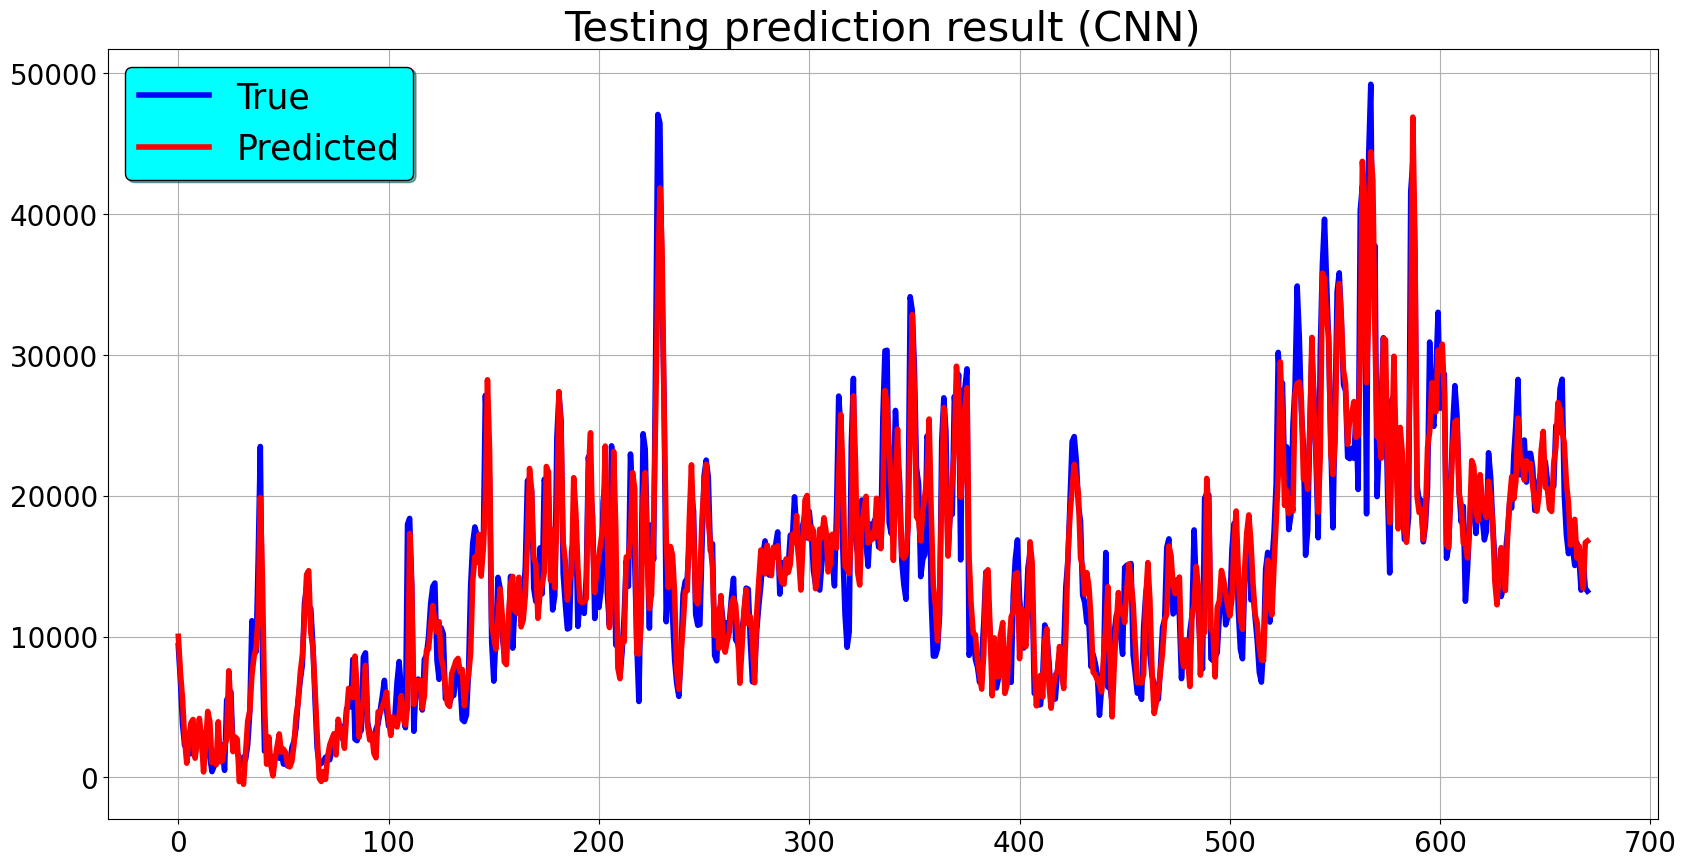

In [58]:

test_predict_1 = model_1.predict(X)
print('RMSE :', np.sqrt(mean_squared_error(y, test_predict_1)))
from sklearn.metrics import r2_score
print('Accuracy :', round(r2_score(y, test_predict_1)*100,2))
plt.figure(figsize = (20,10))
plt.grid(visible=True, which='major', axis='both')
plt.title('Testing prediction result (CNN)', fontsize = 30)
y_test_ = scaler.inverse_transform(y)
test_predict_1 = scaler.inverse_transform(test_predict_1)
plt.plot(range(len(y)), y_test_,linewidth = 4, label='True', color = 'blue')
plt.plot(range(len(y)), test_predict_1,linewidth = 4,color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()



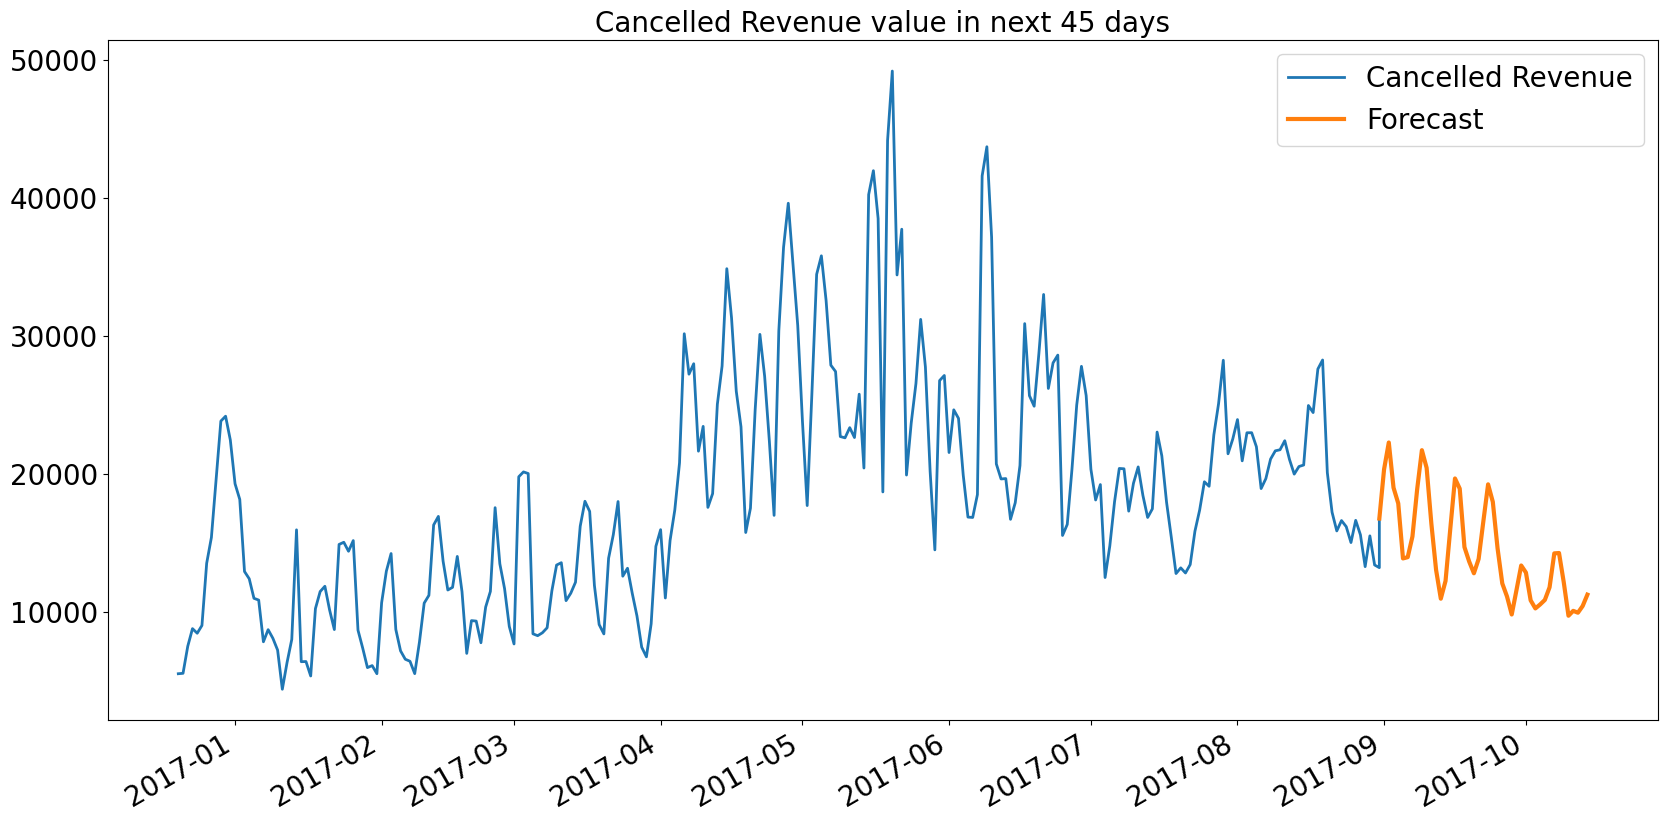

In [59]:
import datetime
x_input = X[-1:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
lst_output = []
n_steps = 60
i = 0
forecast = []
while i < 45:
    if len(temp_input) > 60:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        forecast.append(x_input)
        yhat = model_1.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        forecast.append(x_input)
        yhat = model_1.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

df3 = scaler.inverse_transform(lst_output)
df1 = scaler.inverse_transform(cancelled_revenue).tolist()
df1.extend(scaler.inverse_transform(df3).tolist())

today = datetime.datetime.now().strftime('%m/%d/%Y')
forecast_dates = pd.date_range(start='31/08/2017', periods=45)
forecast = pd.DataFrame(forecast_dates, columns=['Date'])
forecast['Date'] = pd.to_datetime(forecast['Date'])
forecast.sort_values('Date', inplace=True)
forecast['cancelled_revenue'] = df3
forecast.set_index('Date', inplace=True)
result_df = pd.concat([hotel_revenue[['cancelled_revenue']], forecast])

ax = result_df[-300:-44].plot(figsize=(20, 10), linewidth=2, fontsize=20, grid=True)
result_df[-45:].plot(ax=ax, linewidth=3)
plt.title('Cancelled Revenue value in next 45 days', fontsize=20)
plt.legend(['Cancelled Revenue', 'Forecast'], fontsize=20)
plt.show()

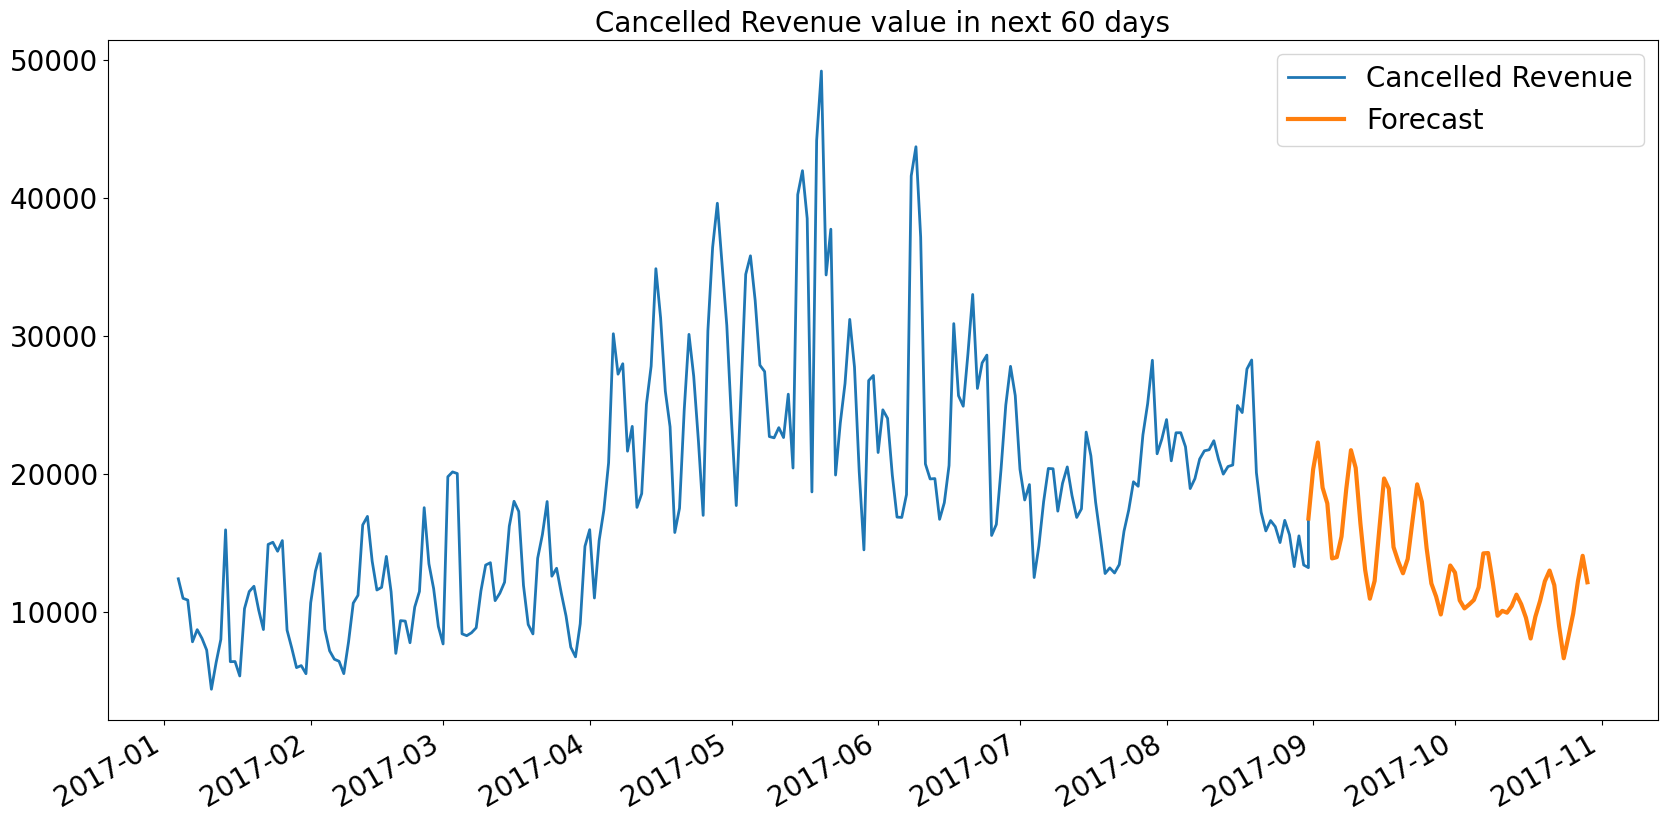

In [60]:
x_input = X[-1:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
lst_output = []
n_steps = 60
i = 0
forecast = []

while i < 60:
    if len(temp_input) > 60:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)

        x_input = x_input.reshape((1, n_steps, 1))
        forecast.append(x_input)
        yhat = model_1.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        forecast.append(x_input)
        yhat = model_1.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

df3 = scaler.inverse_transform(lst_output)
df1 = scaler.inverse_transform(cancelled_revenue).tolist()
df1.extend(df3)
today = datetime.datetime.now().strftime('%m/%d/%Y')
forecast_dates = pd.date_range(start='31/08/2017', periods=60)
forecast = pd.DataFrame(forecast_dates, columns=['Date'])
forecast['Date'] = pd.to_datetime(forecast['Date'])
forecast.sort_values('Date', inplace=True)
forecast['cancelled_revenue'] = df3
forecast.set_index('Date', inplace=True)
result_df = pd.concat([hotel_revenue[['cancelled_revenue']], forecast])

ax = result_df[-300:-59].plot(figsize=(20, 10), linewidth=2, fontsize=20, grid=True)
result_df[-60:].plot(ax=ax, linewidth=3)
plt.title('Cancelled Revenue value in next 60 days', fontsize=20)
plt.legend(['Cancelled Revenue', 'Forecast'], fontsize=20)
plt.show()

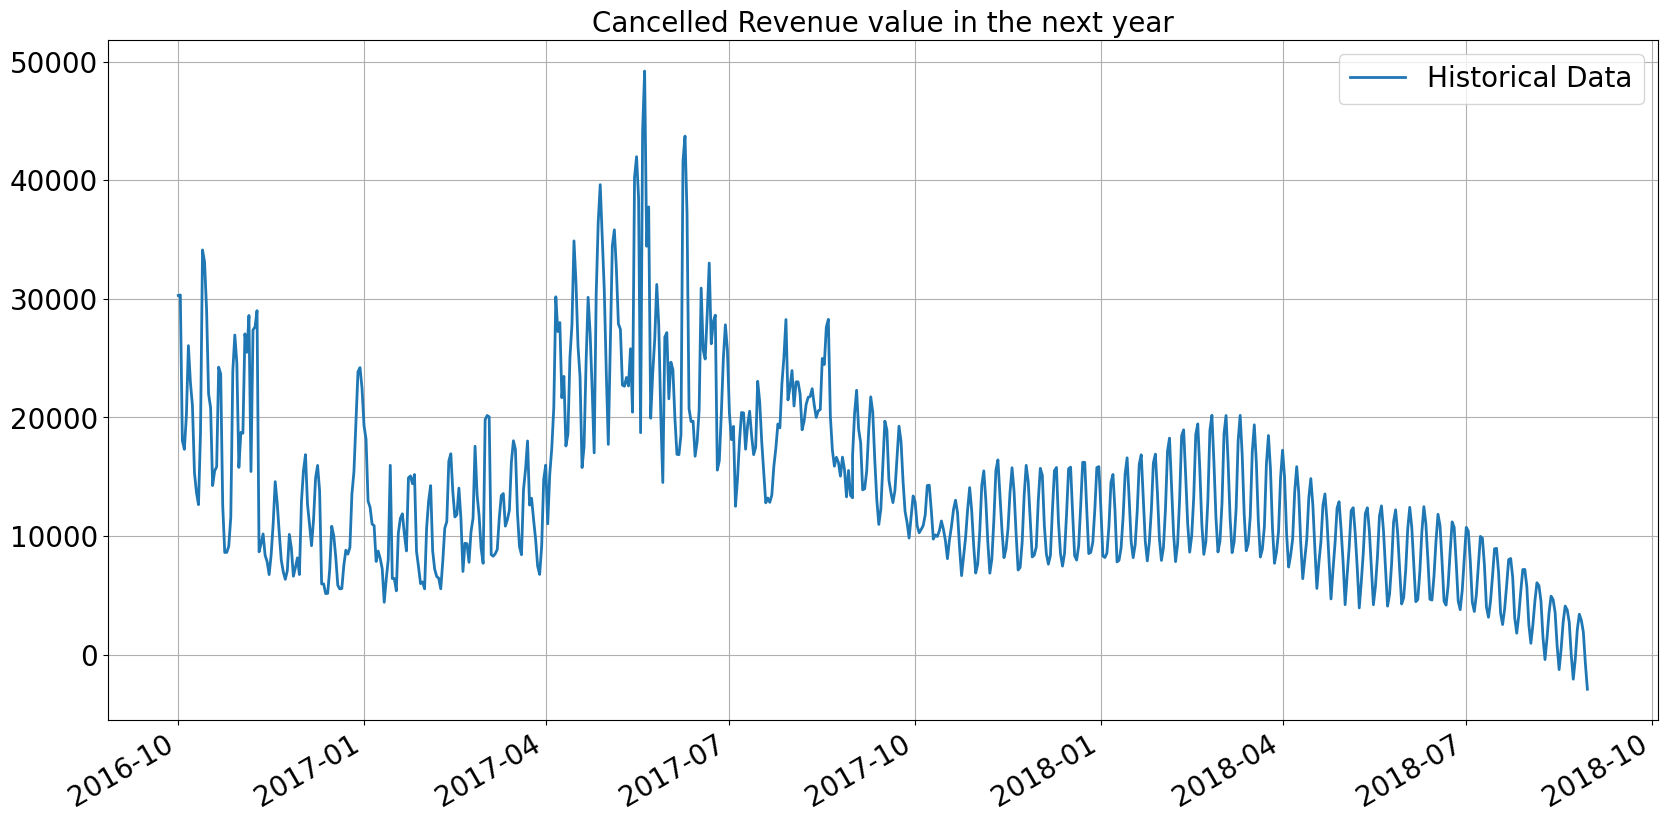

In [61]:
import datetime
x_input = X[-1:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
lst_output = []
n_steps = 60
i = 0
forecast = []

while i < 365:
    if len(temp_input) > 60:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)

        x_input = x_input.reshape((1, n_steps, 1))
        forecast.append(x_input)
        yhat = model_1.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        forecast.append(x_input)
        yhat = model_1.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

df3 = scaler.inverse_transform(lst_output)
df1 = scaler.inverse_transform(cancelled_revenue).tolist()
df1.extend(df3)
today = datetime.datetime.now().strftime('%m/%d/%Y')
forecast_dates = pd.date_range(start='31/08/2017', periods=365)
forecast = pd.DataFrame(forecast_dates, columns=['Date'])
forecast['Date'] = pd.to_datetime(forecast['Date'])
forecast.sort_values('Date', inplace=True)
forecast['cancelled_revenue'] = df3
forecast.set_index('Date', inplace=True)
result_df = pd.concat([hotel_revenue[['cancelled_revenue']], forecast])

ax = result_df[-700:].plot(figsize=(20, 10), linewidth=2, fontsize=20, grid=True)
plt.title('Cancelled Revenue value in the next year', fontsize=20)
plt.legend(['Historical Data', 'Forecast'], fontsize=20)
plt.show()

In [ ]:
##Redo without scaling